In [ ]:
import pandas as pd

path = "/content/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
# prompt: Using dataframe df: Generate code for finding unit prices for each customer type for each category

unit_table = df.pivot_table(values='unit_price', index='customer_type', columns='category')
unit_table

category,baby products,baked goods,baking,beverages,canned foods,cheese,cleaning products,condiments and sauces,dairy,frozen,...,meat,medicine,packaged foods,personal care,pets,refrigerated items,seafood,snacks,spices and herbs,vegetables
customer_type,,,,,,,,,,,,,,,,,,,,,
basic,12.241020,7.448621,5.563585,12.950606,6.370899,8.668571,12.625088,7.350000,8.084366,9.378889,...,14.740000,17.287872,4.919245,9.166667,9.997692,6.933333,16.074091,2.505254,3.228095,2.252500
gold,12.040000,7.402329,5.173636,13.066596,6.106883,9.285238,13.156071,7.195405,7.795634,10.301864,...,14.881463,16.997317,4.940000,9.323333,10.872353,6.725616,16.094000,2.314000,2.540000,2.629080
non-member,12.407778,7.778235,5.087872,12.454912,6.086591,8.570519,12.360149,6.508919,7.822927,9.992083,...,15.485890,17.156667,5.004851,9.471818,10.398333,7.037059,16.051111,2.347692,3.178462,2.380395
premium,12.746410,7.727079,5.411818,11.828095,6.125484,8.151667,12.915397,6.576486,8.133421,10.473636,...,14.864026,17.426538,4.979423,9.480323,10.923333,6.665000,15.839091,2.003636,2.932857,2.215824
standard,12.063333,7.690917,5.447407,12.882647,6.661429,8.566471,13.065510,6.824286,8.072667,10.057857,...,15.135833,16.767500,4.781176,8.608421,10.552069,7.174524,16.284000,2.617586,3.196977,2.360588


<Axes: xlabel='customer_type'>

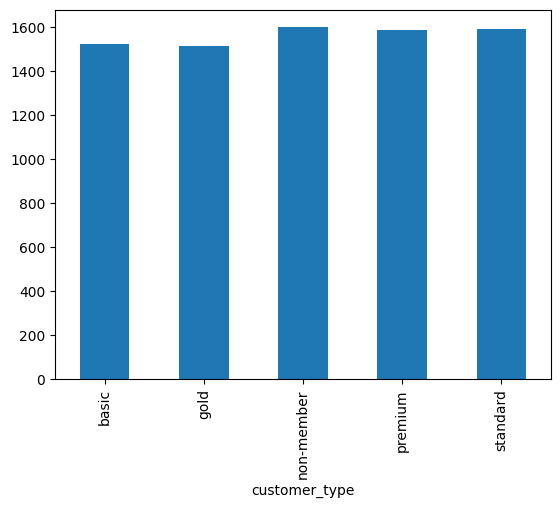

In [ ]:
# @title Transactions per Customer Type

df.groupby('customer_type')['transaction_id'].count().plot(kind='bar')

In [ ]:
# prompt: Using dataframe df: Least preferred category

df.groupby('category')['quantity'].sum().sort_values(ascending=True).head(1)


category
spices and herbs    304
Name: quantity, dtype: int64

In [ ]:
# prompt: Using dataframe df: find the earliest & latest timestamp

print(df['timestamp'].min())
print(df['timestamp'].max())


2022-03-01 09:00:13
2022-03-07 19:59:54


## Shop opens at 09:00 hrs and closes at around 19:20 hours on every day of the week

In [ ]:
df.shape

(7829, 9)

In [ ]:
df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
revenue           0
hour              0
day_of_week       0
month             0
time_of_day       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

In [ ]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


- The maximum amount spent per transaction is: $95.96

- The average amount spent per transaction is: $19.71

- The minimum amount spent per transaction is: $0.19

In [ ]:
columns = ['category','customer_type', 'payment_type']
for column in columns:
  print(column,":")
  print(pd.unique(df[column]))
  print()

category :
['fruit' 'vegetables' 'refrigerated items' 'frozen' 'spices and herbs'
 'canned foods' 'packaged foods' 'condiments and sauces' 'beverages'
 'dairy' 'cheese' 'meat' 'seafood' 'baked goods' 'baking' 'snacks'
 'baby products' 'pets' 'personal care' 'medicine' 'kitchen'
 'cleaning products']

customer_type :
['gold' 'standard' 'premium' 'basic' 'non-member']

payment_type :
['e-wallet' 'debit card' 'cash' 'credit card']



In [ ]:
len(df['product_id'].unique())

300

In [ ]:
len(df['transaction_id'].unique())

7829

# Distribution study

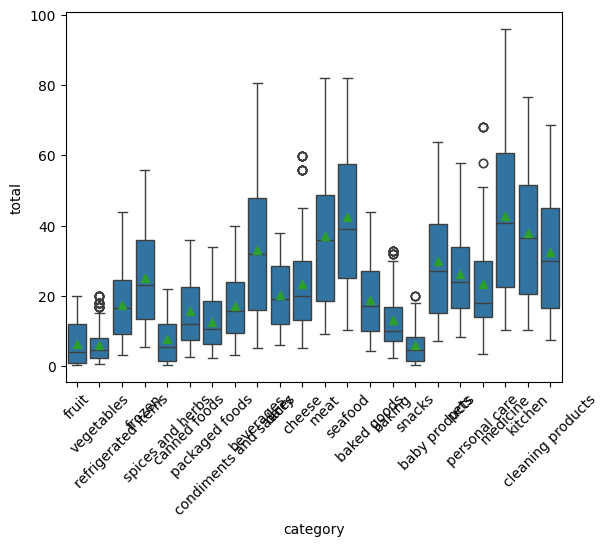

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x = "category",  # Set the category variable on the x-axis
    y = "total",     # Set the value variable on the y-axis
    showmeans=True,  # Show the mean value as a point within the box
    data=df          # Specify the data frame
)

# Rotate x labels to prevent overlapping
plt.xticks(rotation=45)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 6):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 5, aspect: int = 2):
    # Create the bar plot with column on y-axis
    plot = sns.catplot(data=data, y=column, kind='count', height=height, aspect=aspect)
    plot.set(title=f'Distribution of {column}')

    # Iterate through the bars and add annotations
    for ax in plot.axes.flat:
        for p in ax.patches:
            ax.annotate(format(p.get_width(), '.0f'),  # Use p.get_width() for horizontal bars
                        (p.get_width(), p.get_y() + p.get_height() / 2.),  # Adjust position for horizontal bars
                        ha='center', va='center',
                        xytext=(13, 0),  # Adjust the offset for better visibility
                        textcoords='offset points')

    # Show the plot
    plt.show()

"""def correlation_plot(data: pd.DataFrame = None):
    # Convert categorical columns to numeric using one-hot encoding
    data_encoded = pd.get_dummies(data)

    # Compute the correlation matrix
    corr = data_encoded.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(15, 12))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()"""

"def correlation_plot(data: pd.DataFrame = None):\n    # Convert categorical columns to numeric using one-hot encoding\n    data_encoded = pd.get_dummies(data)\n\n    # Compute the correlation matrix\n    corr = data_encoded.corr()\n\n    # Plot the correlation matrix\n    plt.figure(figsize=(15, 12))\n    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)\n    plt.title('Correlation Matrix')\n    plt.show()"

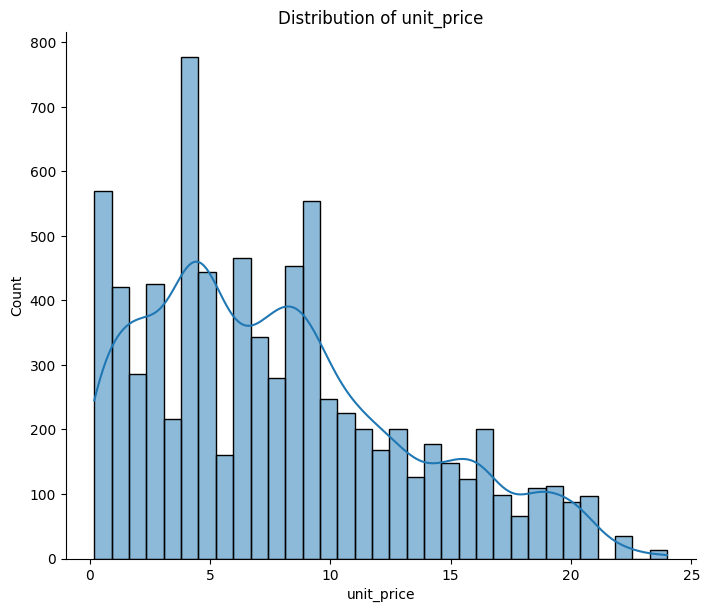

In [ ]:
plot_continuous_distribution(data=df, column='unit_price')

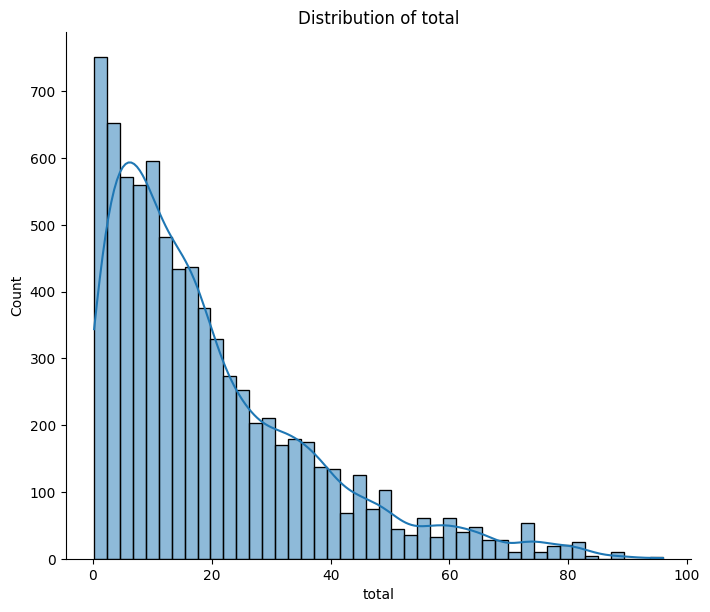

In [ ]:
plot_continuous_distribution(data=df, column='total')

In [ ]:
get_unique_values(df, 'product_id')

Column: product_id has 300 unique values

product_id
ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: count, Length: 300, dtype: int64


In [ ]:
get_unique_values(df, 'category')

Column: category has 22 unique values

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64


In [ ]:
get_unique_values(df, 'payment_type')

Column: payment_type has 4 unique values

payment_type
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: count, dtype: int64


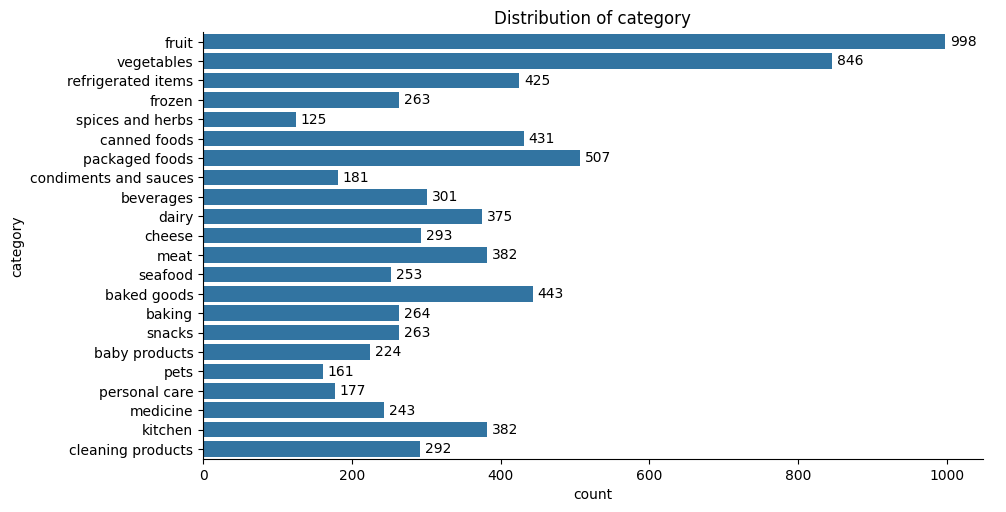

In [ ]:
plot_categorical_distribution(data=df, column='category')

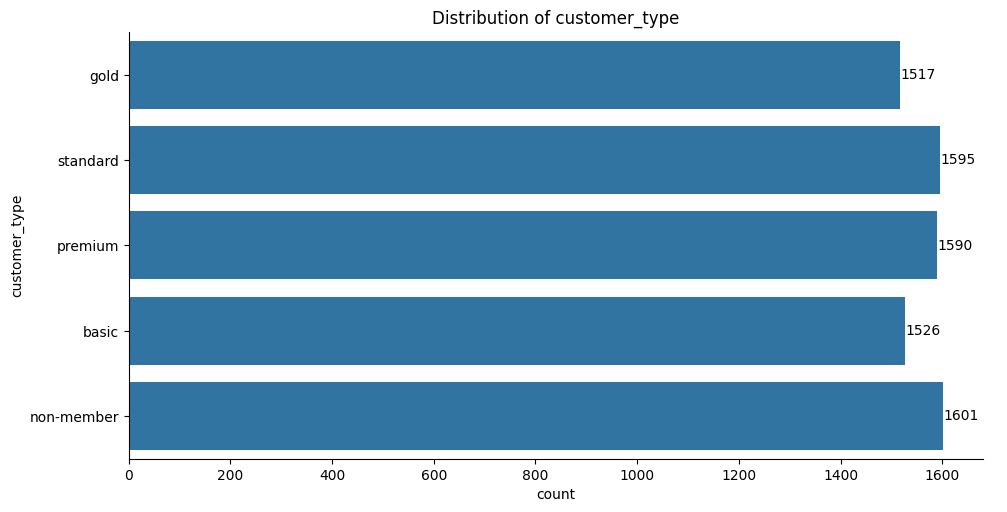

In [ ]:
plot_categorical_distribution(data=df, column='customer_type')

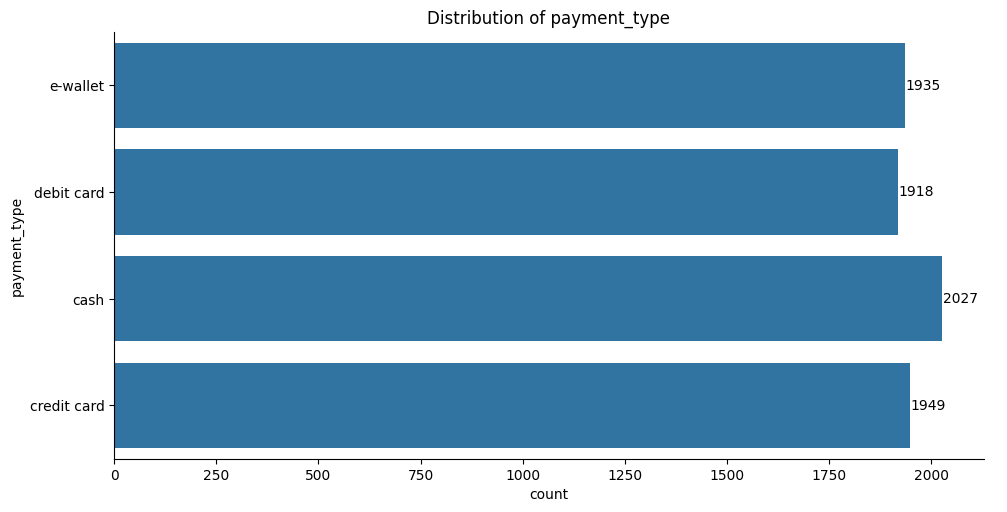

In [ ]:
plot_categorical_distribution(data=df, column='payment_type')

# popular categories among diff types of customers

Most popular category by customer type:
   customer_type category  count
10         basic    fruit    186
32          gold    fruit    197
54    non-member    fruit    187
76       premium    fruit    206
98      standard    fruit    222


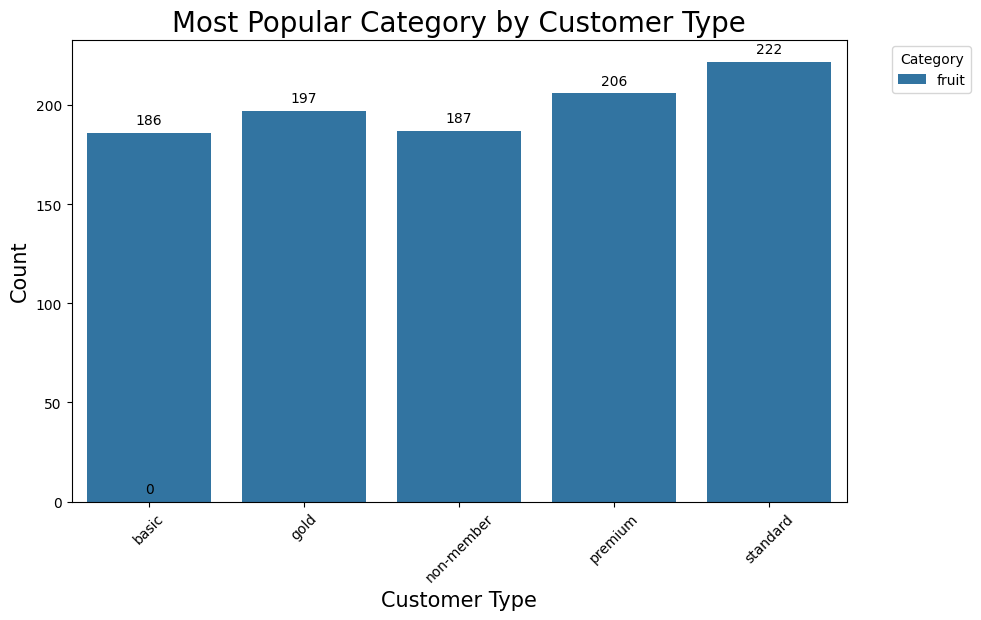

In [ ]:
# Group by customer_type and category, and count occurrences
category_preference = df.groupby(['customer_type', 'category']).size().reset_index(name='count')

# Find the most popular category for each customer type
most_popular_category = category_preference.loc[category_preference.groupby('customer_type')['count'].idxmax()]

# Print the results
print("Most popular category by customer type:")
print(most_popular_category)

# Plot the data for visualization
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='customer_type', y='count', hue='category', data=most_popular_category, dodge=False)
plt.title('Most Popular Category by Customer Type', fontsize=20)
plt.xlabel('Customer Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Add number on top of bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

plt.show()


# The most popular category of purchase regardless of customer type - FRUIT

In [ ]:
# Group by customer_type and category, then count the quantity of each group
df_grouped = df.groupby(['customer_type', 'category']).agg({'quantity': 'count'})

# Sort the groups by quantity in descending order
df_grouped = df_grouped.sort_values(['customer_type', 'quantity'], ascending=[True, False])

# Reset the index
df_grouped.reset_index(inplace=True)

# Save the dataframe to a CSV file
# df_grouped.to_csv('output/customer-type-category-popularity-566a0c.csv', index=False)

df_grouped

,customer_type,category,quantity
0,basic,fruit,186
1,basic,vegetables,160
2,basic,packaged foods,106
3,basic,refrigerated items,90
4,basic,canned foods,89
...,...,...,...
105,standard,spices and herbs,43
106,standard,medicine,40
107,standard,personal care,38
108,standard,condiments and sauces,35


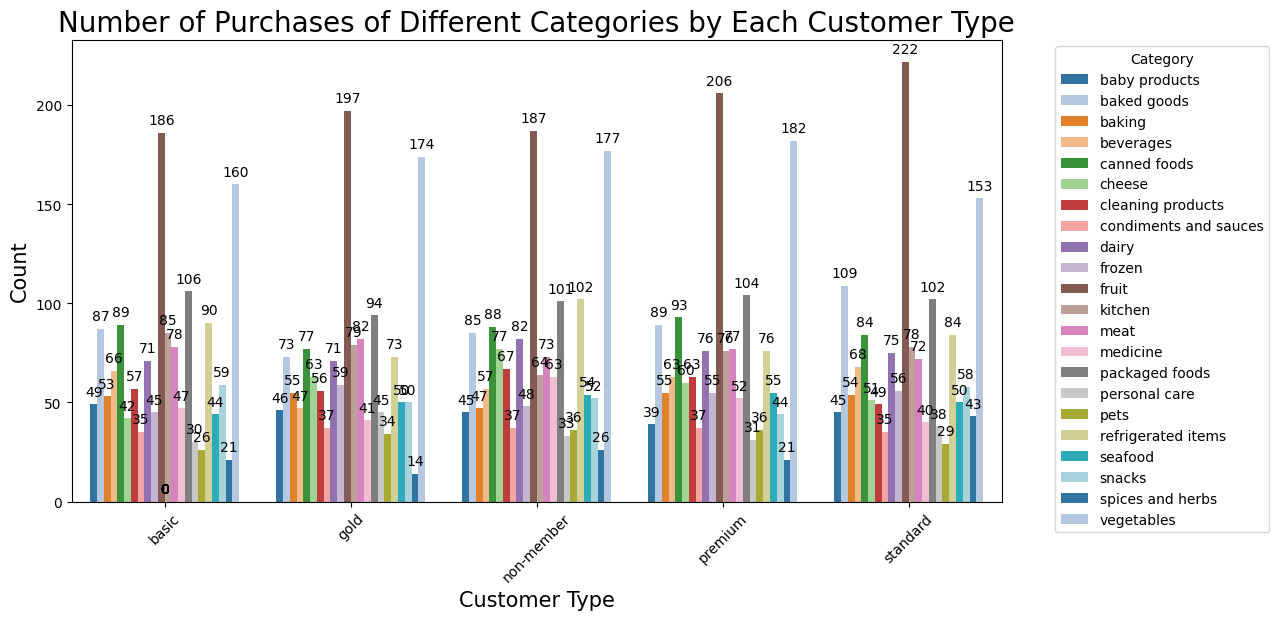

In [ ]:
# Group by customer_type and category, and count occurrences
category_counts = df.groupby(['customer_type', 'category']).size().reset_index(name='count')

# Set a distinct color palette
palette = sns.color_palette("tab20", len(df['category'].unique()))

# Plot the data
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='customer_type', y='count', hue='category', data=category_counts, palette=palette)
plt.title('Number of Purchases of Different Categories by Each Customer Type', fontsize=20)
plt.xlabel('Customer Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Add number on top of bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

plt.show()

In [ ]:
# Group by customer_type and payment_type, then count the number of each group
df_grouped2 = df.groupby(['customer_type', 'payment_type']).size().reset_index(name='counts')

# Sort the groups by counts in descending order
df_grouped2 = df_grouped2.sort_values(['customer_type', 'counts'], ascending=[True, False])

# Save the dataframe to a CSV file
# df_grouped2.to_csv('output/customer_type-payment-preference-3c16bb.csv', index=False)

df_grouped2

,customer_type,payment_type,counts
2,basic,debit card,391
1,basic,credit card,386
3,basic,e-wallet,376
0,basic,cash,373
7,gold,e-wallet,418
5,gold,credit card,389
4,gold,cash,358
6,gold,debit card,352
8,non-member,cash,434
10,non-member,debit card,402


In [ ]:
# prompt: Using dataframe df_grouped2: bar plot

import altair as alt
chart = alt.Chart(df_grouped2).mark_bar().encode(x='customer_type', y='counts', color='payment_type').properties(height=400, width=800)
chart


alt.Chart(...)

# Revenue Generation

In [ ]:
# Calculate total revenue for each transaction
df['revenue'] = df['quantity'] * df['unit_price']

# Function to calculate and display the top revenue generators
def display_top_revenue_generators(data, group_by_column):
    # Group by the desired column and sum the revenue
    revenue_by_column = data.groupby(group_by_column)['revenue'].sum().reset_index()

    # Sort the results in descending order to find the highest revenue generators
    revenue_by_column = revenue_by_column.sort_values(by='revenue', ascending=False)

    # Display the results
    print(f"Top revenue generators by {group_by_column}:\n")
    print(revenue_by_column)

# Calculate and display top revenue generators by product_id
display_top_revenue_generators(df, 'product_id')

# Calculate and display top revenue generators by category
display_top_revenue_generators(df, 'category')

# Calculate and display top revenue generators by customer_type
display_top_revenue_generators(df, 'customer_type')

Top revenue generators by product_id:

                               product_id  revenue
87   3b6cb6b3-cc32-43e9-9cc5-28f750eeb8cf  2089.98
45   1dbe2caf-d1ed-486d-be49-13697c170a30  1922.96
258  cb8ce677-5883-46e8-9c85-bf1c88841ef9  1842.03
288  ed7f6b14-67c9-42a4-8576-c803020eedda  1839.08
124  5ac95f45-65d3-4ef0-8689-3ff0d9059362  1617.67
..                                    ...      ...
256  caf41d5d-31a4-4a6d-aa2f-1bb00d9f8923     8.93
115  4e4ad9f3-86ca-44a3-bb89-9256bde27f9e     7.60
297  fcc9e0ca-ad36-4925-8306-4369afd6cd41     4.75
253  c8de27d0-2c44-4b5a-b178-59c45d054ccb     3.43
173  81e2fcc6-1e50-4eff-975f-751f18e76444     3.42

[300 rows x 2 columns]
Top revenue generators by category:

                 category   revenue
11                kitchen  14456.65
12                   meat  14102.31
18                seafood  10754.81
13               medicine  10393.78
3               beverages   9930.64
6       cleaning products   9483.75
1             baked goods   8348.21


<ipython-input-58-030cc823b549>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='revenue', y=group_by_column, data=revenue_by_column, palette='viridis')


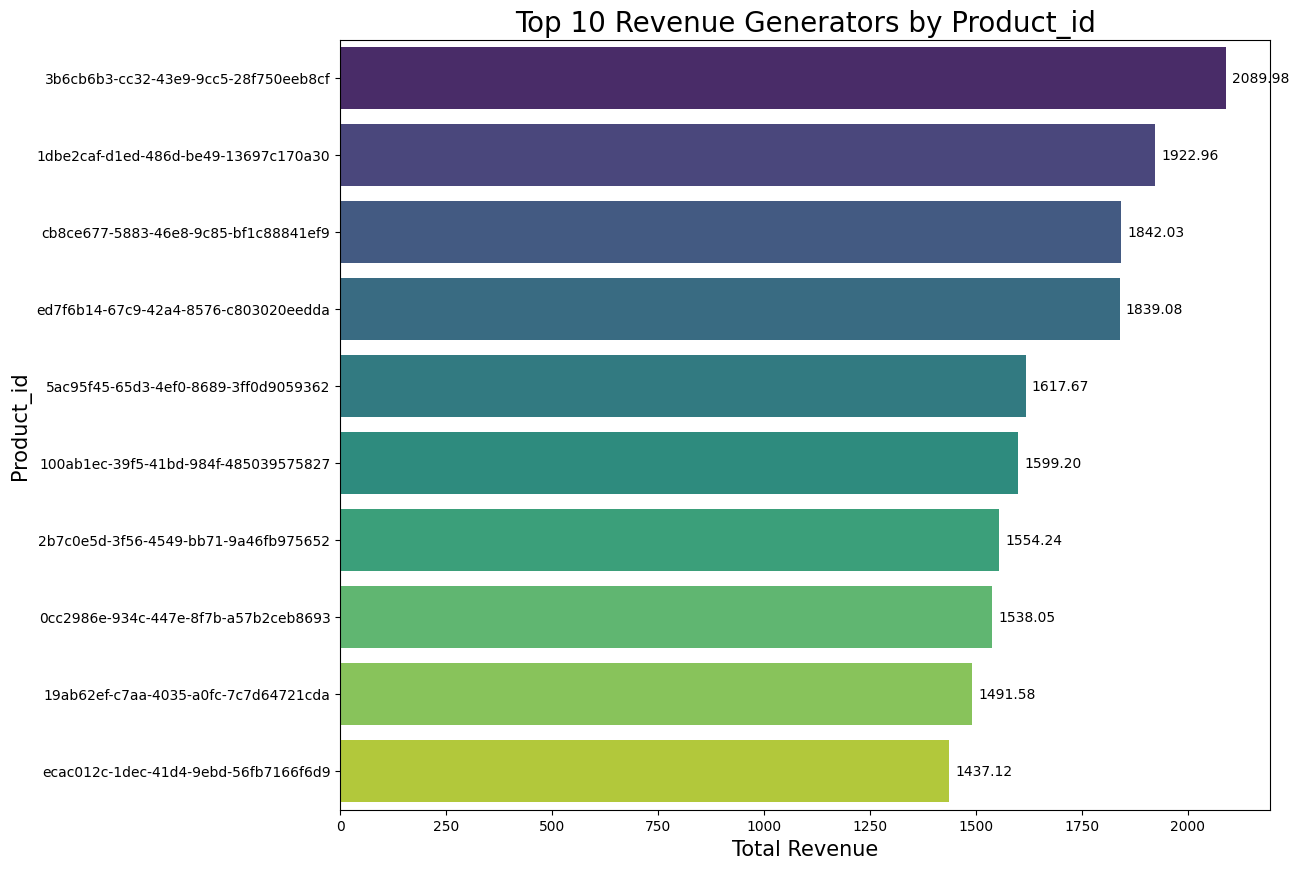

Top 10 revenue generators by product_id:

                               product_id  revenue
87   3b6cb6b3-cc32-43e9-9cc5-28f750eeb8cf  2089.98
45   1dbe2caf-d1ed-486d-be49-13697c170a30  1922.96
258  cb8ce677-5883-46e8-9c85-bf1c88841ef9  1842.03
288  ed7f6b14-67c9-42a4-8576-c803020eedda  1839.08
124  5ac95f45-65d3-4ef0-8689-3ff0d9059362  1617.67
24   100ab1ec-39f5-41bd-984f-485039575827  1599.20
65   2b7c0e5d-3f56-4549-bb71-9a46fb975652  1554.24
17   0cc2986e-934c-447e-8f7b-a57b2ceb8693  1538.05
38   19ab62ef-c7aa-4035-a0fc-7c7d64721cda  1491.58
287  ecac012c-1dec-41d4-9ebd-56fb7166f6d9  1437.12


<ipython-input-58-030cc823b549>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='revenue', y=group_by_column, data=revenue_by_column, palette='viridis')


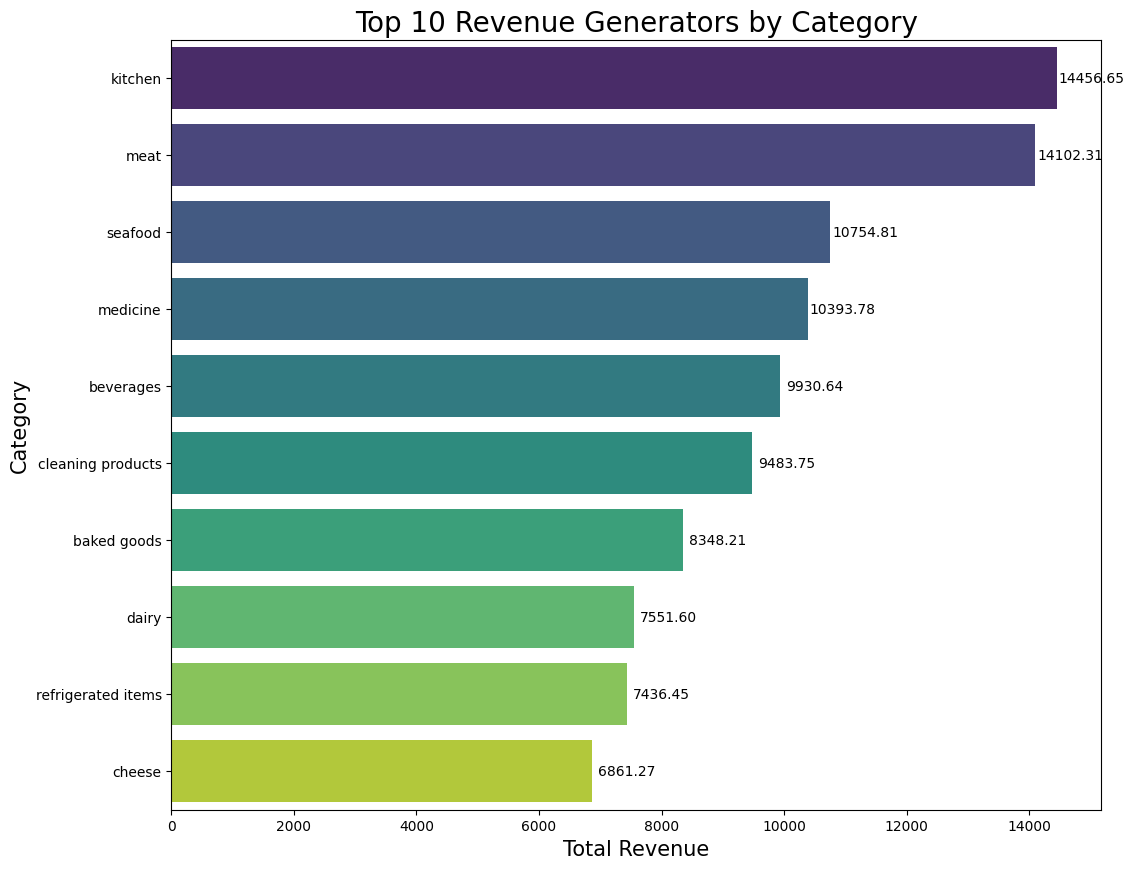

Top 10 revenue generators by category:

              category   revenue
11             kitchen  14456.65
12                meat  14102.31
18             seafood  10754.81
13            medicine  10393.78
3            beverages   9930.64
6    cleaning products   9483.75
1          baked goods   8348.21
8                dairy   7551.60
17  refrigerated items   7436.45
5               cheese   6861.27


<ipython-input-58-030cc823b549>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='revenue', y=group_by_column, data=revenue_by_column, palette='viridis')


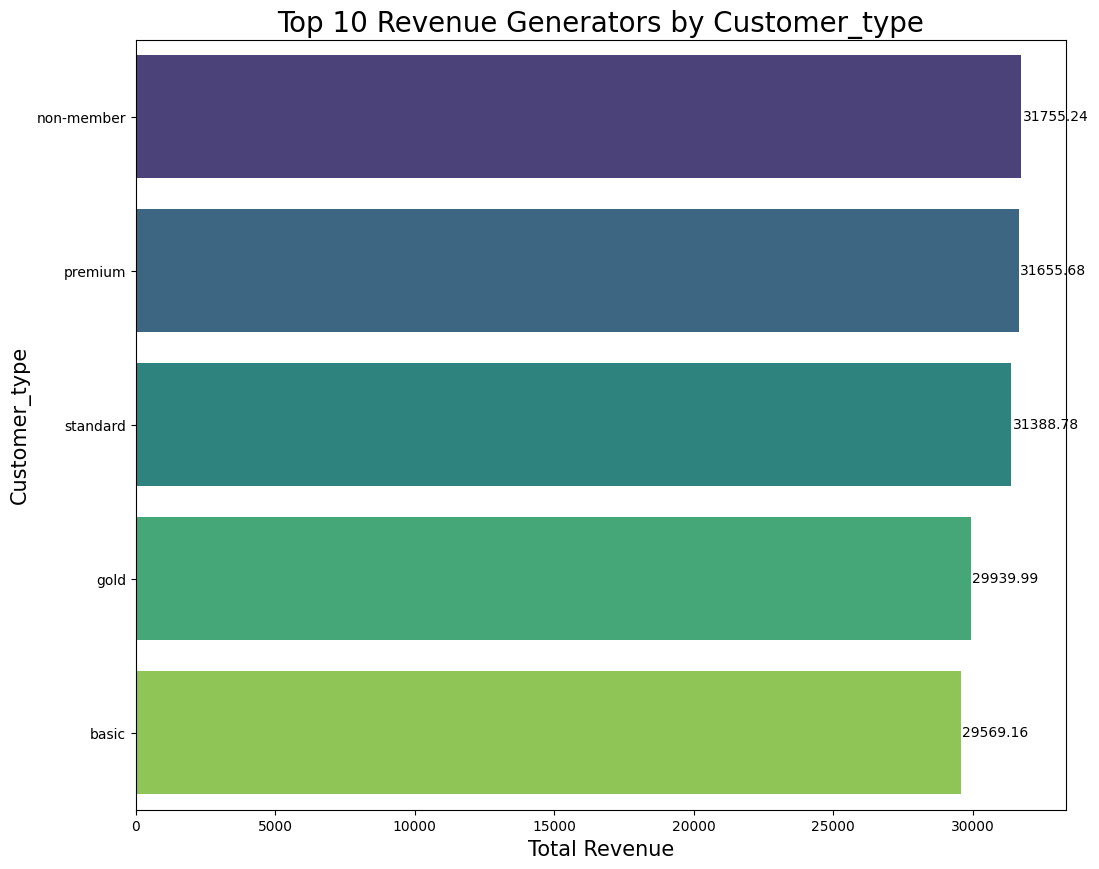

Top 10 revenue generators by customer_type:

  customer_type   revenue
2    non-member  31755.24
3       premium  31655.68
4      standard  31388.78
1          gold  29939.99
0         basic  29569.16


In [ ]:
# Calculate total revenue for each transaction
df['revenue'] = df['quantity'] * df['unit_price']

# Function to calculate and display the top revenue generators with plots
def display_top_revenue_generators(data, group_by_column, top_n=10):
    # Group by the desired column and sum the revenue
    revenue_by_column = data.groupby(group_by_column)['revenue'].sum().reset_index()

    # Sort the results in descending order to find the highest revenue generators
    revenue_by_column = revenue_by_column.sort_values(by='revenue', ascending=False).head(top_n)

    # Plot the results
    plt.figure(figsize=(12, 10))
    barplot = sns.barplot(x='revenue', y=group_by_column, data=revenue_by_column, palette='viridis')
    plt.title(f'Top {top_n} Revenue Generators by {group_by_column.capitalize()}', fontsize=20)
    plt.ylabel(group_by_column.capitalize(), fontsize=15)
    plt.xlabel('Total Revenue', fontsize=15)

    # Add number on top of bars
    for p in barplot.patches:
        barplot.annotate(format(p.get_width(), '.2f'),
                         (p.get_width(), p.get_y() + p.get_height() / 2.),
                         ha='center', va='center',
                         xytext=(25, 0),
                         textcoords='offset points')

    plt.show()

    # Display the results
    print(f"Top {top_n} revenue generators by {group_by_column}:\n")
    print(revenue_by_column)

# Calculate and display top revenue generators by product_id
display_top_revenue_generators(df, 'product_id')

# Calculate and display top revenue generators by category
display_top_revenue_generators(df, 'category')

# Calculate and display top revenue generators by customer_type
display_top_revenue_generators(df, 'customer_type')

# Sales trends

<ipython-input-73-73145b9e2241>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=time_period, y='count', data=busiest_times, palette='viridis')


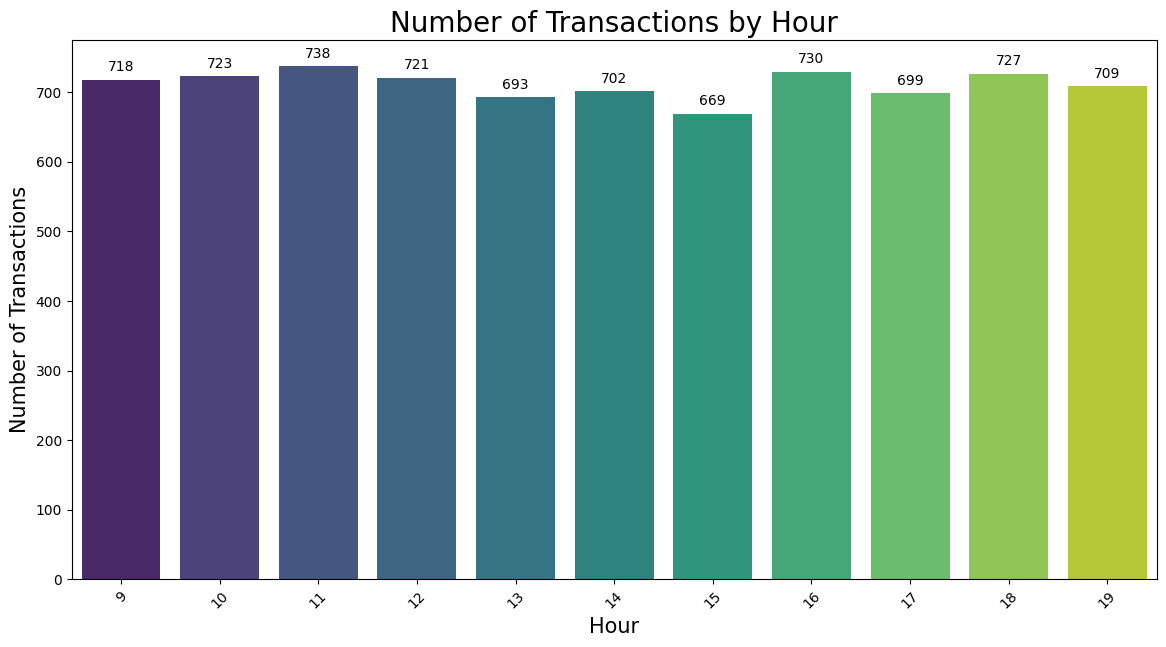

Busiest times by hour:

    hour  count
0      9    718
1     10    723
2     11    738
3     12    721
4     13    693
5     14    702
6     15    669
7     16    730
8     17    699
9     18    727
10    19    709


<ipython-input-73-73145b9e2241>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=time_period, y='count', data=busiest_times, palette='viridis')


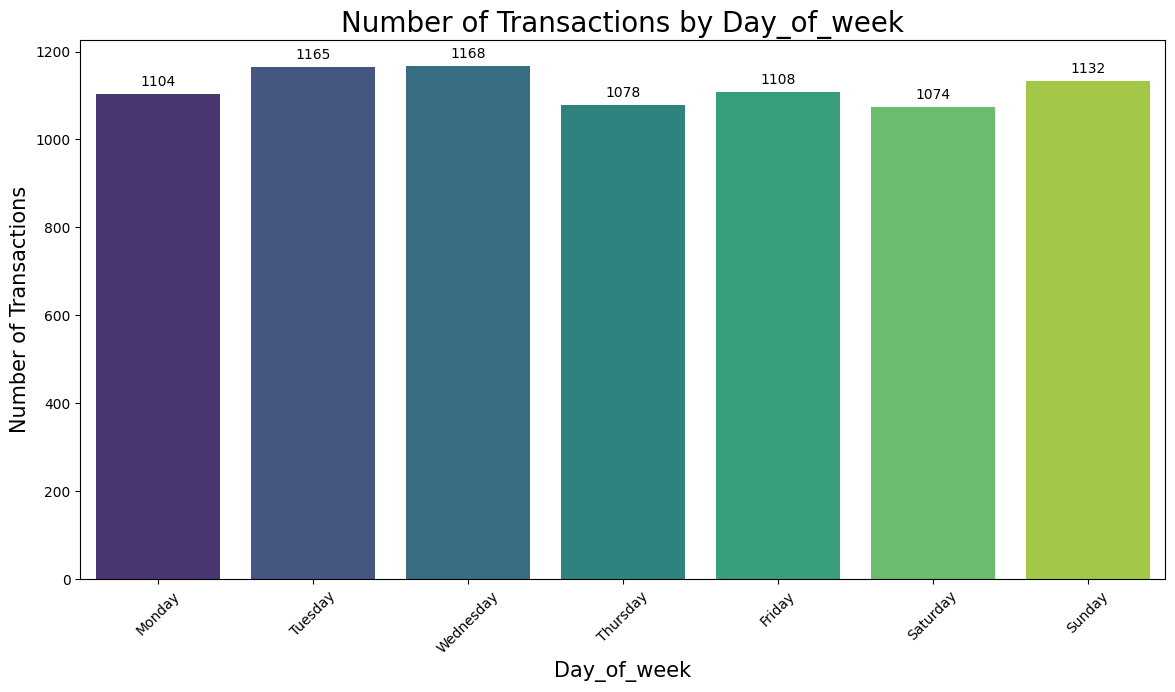

Busiest times by day_of_week:

  day_of_week  count
1      Monday   1104
5     Tuesday   1165
6   Wednesday   1168
4    Thursday   1078
0      Friday   1108
2    Saturday   1074
3      Sunday   1132


In [ ]:
# Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract hour, day of the week, and month from the timestamp
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
#df['month'] = df['timestamp'].dt.month_name()

# Function to plot the busiest times for a given time period
def plot_busiest_times(data, time_period):
    # Group by the desired time period and count the occurrences
    busiest_times = data.groupby(time_period).size().reset_index(name='count')

    # Sort the results if the time period is day of the week or month
    if time_period == 'day_of_week':
        ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        busiest_times[time_period] = pd.Categorical(busiest_times[time_period], categories=ordered_days, ordered=True)
        busiest_times = busiest_times.sort_values(by=time_period)

    # Plot the results
    plt.figure(figsize=(14, 7))
    barplot = sns.barplot(x=time_period, y='count', data=busiest_times, palette='viridis')
    plt.title(f'Number of Transactions by {time_period.capitalize()}',fontsize = 20)
    plt.xlabel(time_period.capitalize(),fontsize = 15)
    plt.ylabel('Number of Transactions',fontsize = 15)
    plt.xticks(rotation=45)

    # Add number on top of bars
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

    plt.show()

    # Print the results
    print(f"Busiest times by {time_period}:\n")
    print(busiest_times)

# Analyze and plot busiest hours of the day
plot_busiest_times(df, 'hour')

# Analyze and plot busiest days of the week
plot_busiest_times(df, 'day_of_week')

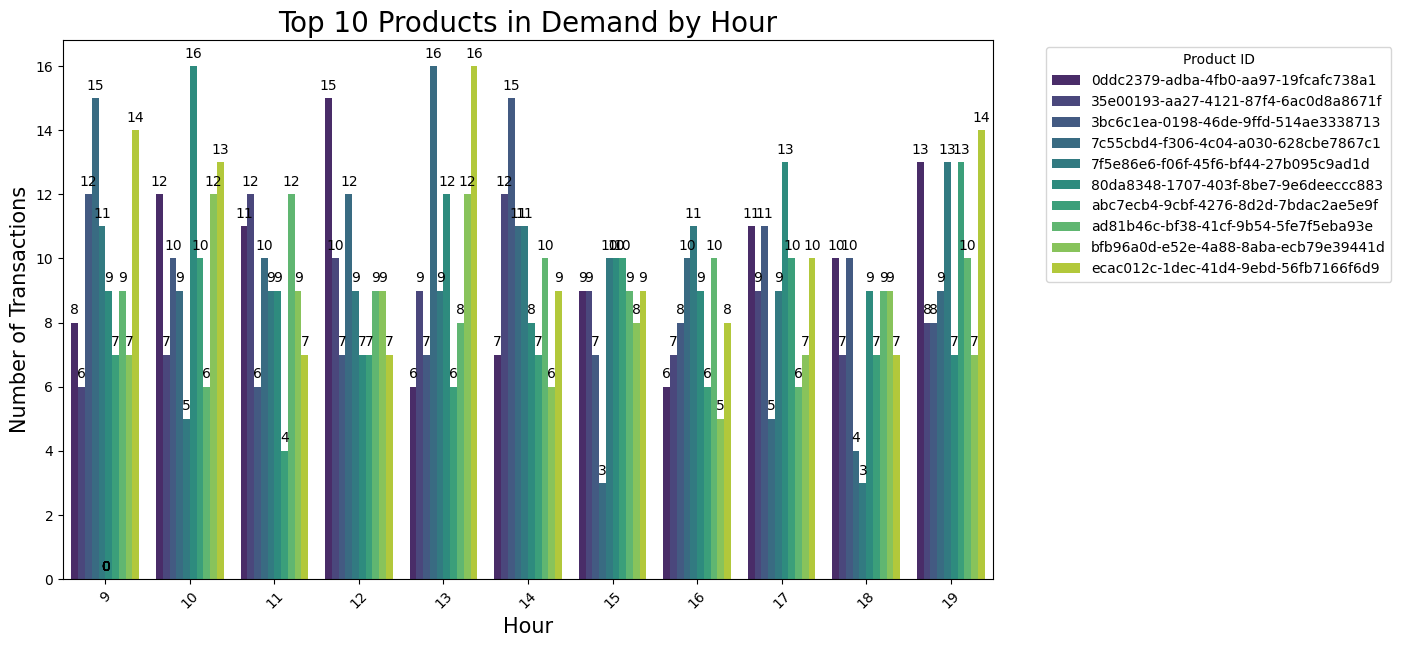

Top 10 products in demand by hour:

                                product_id  hour  count
170   0ddc2379-adba-4fb0-aa97-19fcafc738a1     9      8
171   0ddc2379-adba-4fb0-aa97-19fcafc738a1    10     12
172   0ddc2379-adba-4fb0-aa97-19fcafc738a1    11     11
173   0ddc2379-adba-4fb0-aa97-19fcafc738a1    12     15
174   0ddc2379-adba-4fb0-aa97-19fcafc738a1    13      6
...                                    ...   ...    ...
2636  ecac012c-1dec-41d4-9ebd-56fb7166f6d9    15      9
2637  ecac012c-1dec-41d4-9ebd-56fb7166f6d9    16      8
2638  ecac012c-1dec-41d4-9ebd-56fb7166f6d9    17     10
2639  ecac012c-1dec-41d4-9ebd-56fb7166f6d9    18      7
2640  ecac012c-1dec-41d4-9ebd-56fb7166f6d9    19     14

[110 rows x 3 columns]


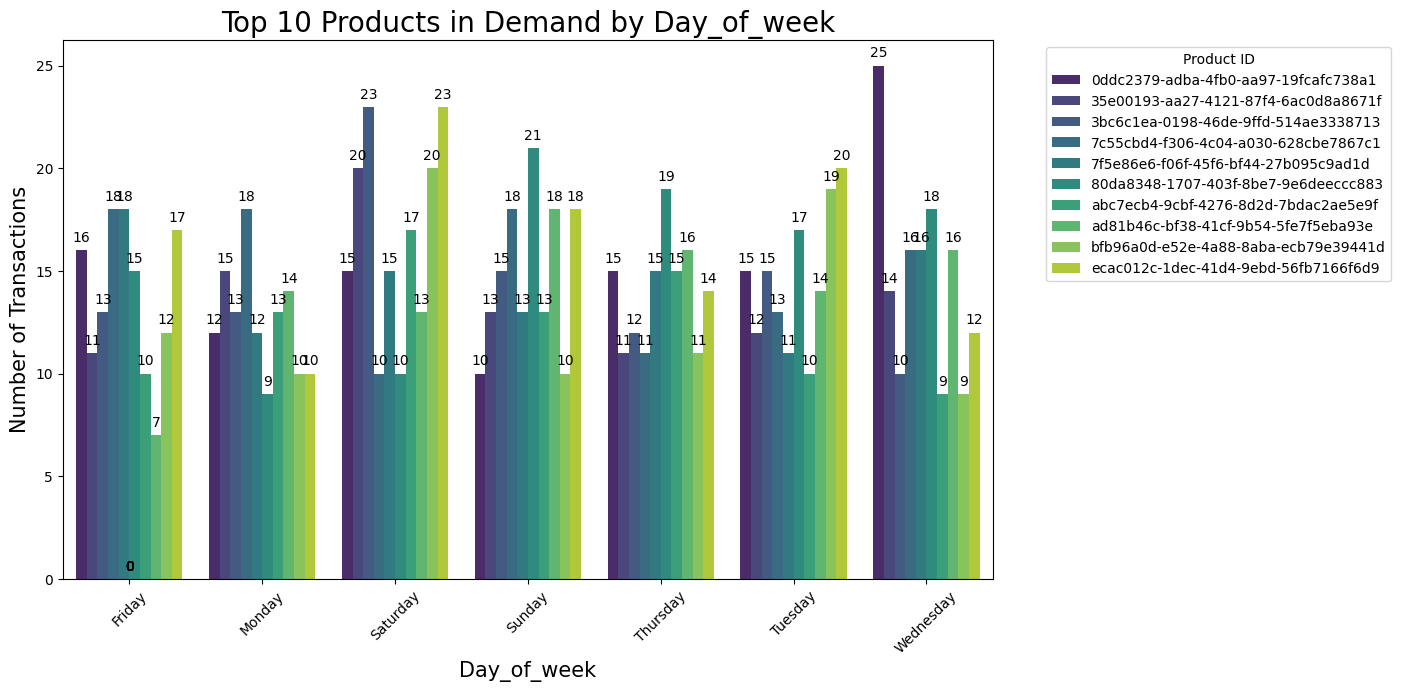

Top 10 products in demand by day_of_week:

                                product_id day_of_week  count
117   0ddc2379-adba-4fb0-aa97-19fcafc738a1      Friday     16
118   0ddc2379-adba-4fb0-aa97-19fcafc738a1      Monday     12
119   0ddc2379-adba-4fb0-aa97-19fcafc738a1    Saturday     15
120   0ddc2379-adba-4fb0-aa97-19fcafc738a1      Sunday     10
121   0ddc2379-adba-4fb0-aa97-19fcafc738a1    Thursday     15
...                                    ...         ...    ...
1852  ecac012c-1dec-41d4-9ebd-56fb7166f6d9    Saturday     23
1853  ecac012c-1dec-41d4-9ebd-56fb7166f6d9      Sunday     18
1854  ecac012c-1dec-41d4-9ebd-56fb7166f6d9    Thursday     14
1855  ecac012c-1dec-41d4-9ebd-56fb7166f6d9     Tuesday     20
1856  ecac012c-1dec-41d4-9ebd-56fb7166f6d9   Wednesday     12

[70 rows x 3 columns]


In [ ]:
# Function to plot the demand for products during specific times
def plot_product_demand(data, time_period, top_n=10):
    # Group by product_id and the desired time period, then count occurrences
    demand = data.groupby(['product_id', time_period]).size().reset_index(name='count')

    # Find the top products in demand
    top_products = demand.groupby('product_id')['count'].sum().nlargest(top_n).index
    top_demand = demand[demand['product_id'].isin(top_products)]

    # Plot the results
    plt.figure(figsize=(12, 7))
    barplot = sns.barplot(x=time_period, y='count', hue='product_id', data=top_demand, palette='viridis')
    plt.title(f'Top {top_n} Products in Demand by {time_period.capitalize()}',fontsize = 20)
    plt.xlabel(time_period.capitalize(),fontsize = 15)
    plt.ylabel('Number of Transactions',fontsize = 15)
    plt.xticks(rotation=45)

    # Add number on top of bars
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

    plt.legend(title='Product ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Print the results
    print(f"Top {top_n} products in demand by {time_period}:\n")
    print(top_demand)

# Analyze and plot product demand by hour
plot_product_demand(df, 'hour')

# Analyze and plot product demand by day of the week
plot_product_demand(df, 'day_of_week')

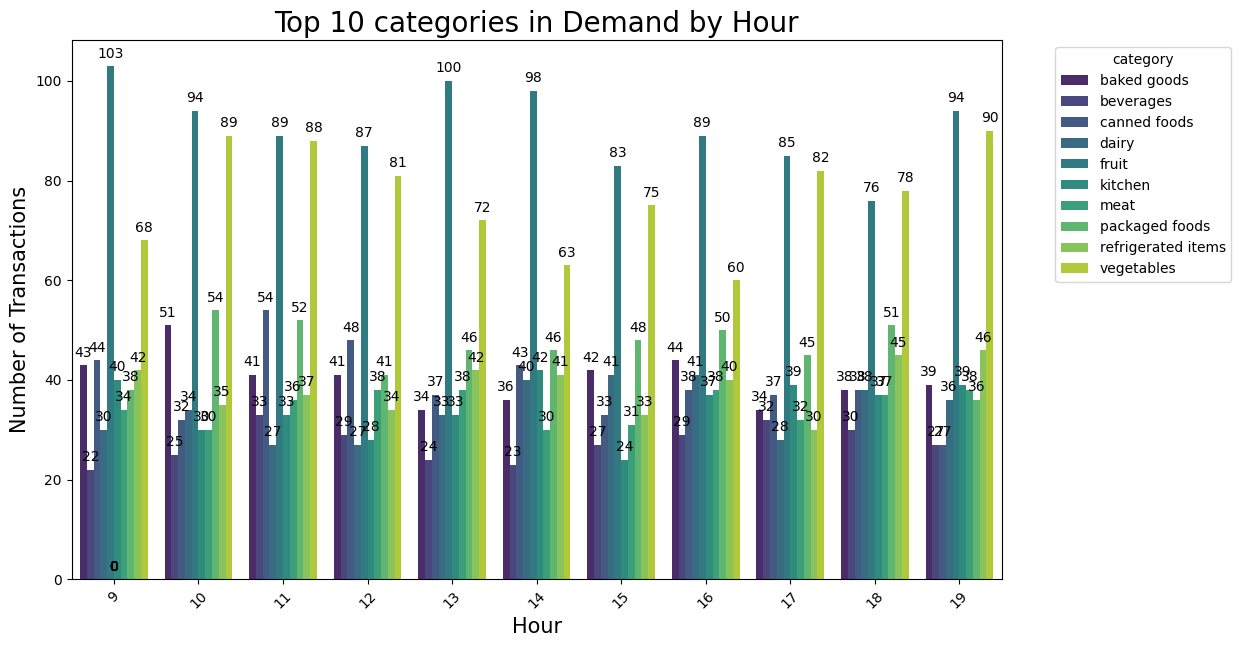

Top 10 categories in demand by hour:

        category  hour  count
11   baked goods     9     43
12   baked goods    10     51
13   baked goods    11     41
14   baked goods    12     41
15   baked goods    13     34
..           ...   ...    ...
237   vegetables    15     75
238   vegetables    16     60
239   vegetables    17     82
240   vegetables    18     78
241   vegetables    19     90

[110 rows x 3 columns]


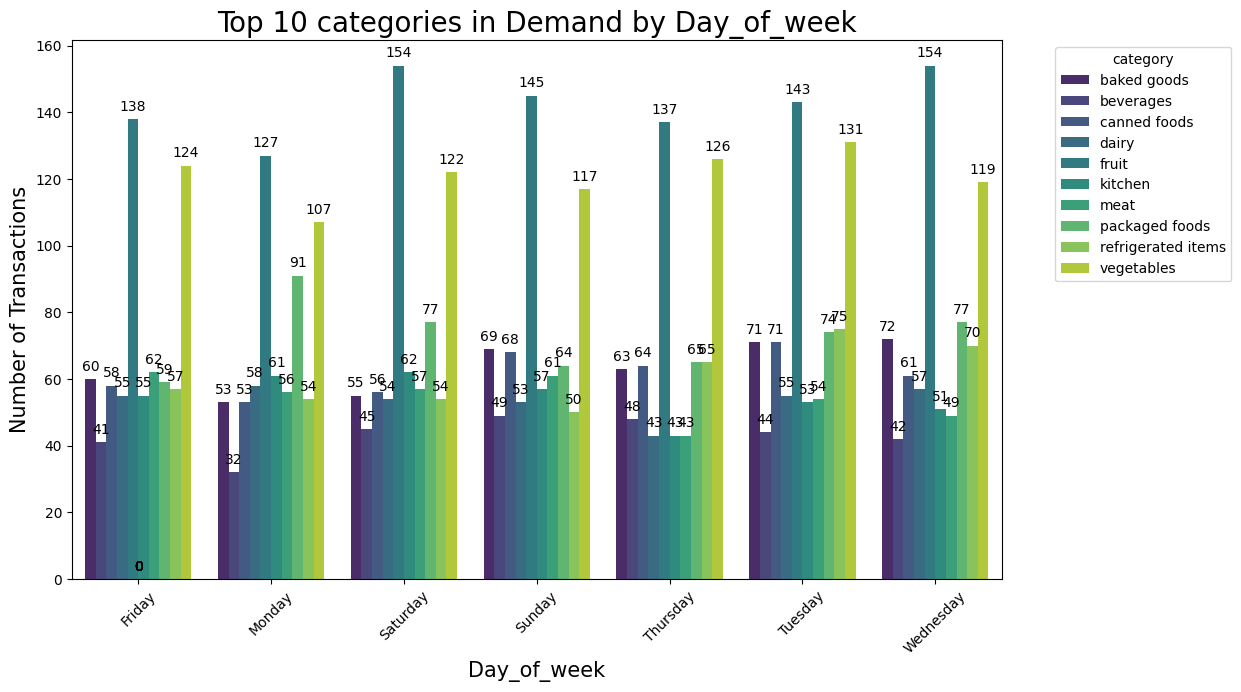

Top 10 categories in demand by day_of_week:

        category day_of_week  count
7    baked goods      Friday     60
8    baked goods      Monday     53
9    baked goods    Saturday     55
10   baked goods      Sunday     69
11   baked goods    Thursday     63
..           ...         ...    ...
149   vegetables    Saturday    122
150   vegetables      Sunday    117
151   vegetables    Thursday    126
152   vegetables     Tuesday    131
153   vegetables   Wednesday    119

[70 rows x 3 columns]


In [ ]:
# Function to plot the demand for products during specific times
def plot_category_demand(data, time_period, top_n=10):
    # Group by category and the desired time period, then count occurrences
    demand = data.groupby(['category', time_period]).size().reset_index(name='count')

    # Find the top products in demand
    top_products = demand.groupby('category')['count'].sum().nlargest(top_n).index
    top_demand = demand[demand['category'].isin(top_products)]

    # Plot the results
    plt.figure(figsize=(12, 7))
    barplot = sns.barplot(x=time_period, y='count', hue='category', data=top_demand, palette='viridis')
    plt.title(f'Top {top_n} categories in Demand by {time_period.capitalize()}',fontsize = 20)
    plt.xlabel(time_period.capitalize(),fontsize = 15)
    plt.ylabel('Number of Transactions',fontsize = 15)
    plt.xticks(rotation=45)

    # Add number on top of bars
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

    plt.legend(title='category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Print the results
    print(f"Top {top_n} categories in demand by {time_period}:\n")
    print(top_demand)

# Analyze and plot product demand by hour
plot_category_demand(df, 'hour')

# Analyze and plot product demand by day of the week
plot_category_demand(df, 'day_of_week')

<ipython-input-70-b6e73f69b578>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='time_of_day', y='count', data=sales_trend, palette='viridis')


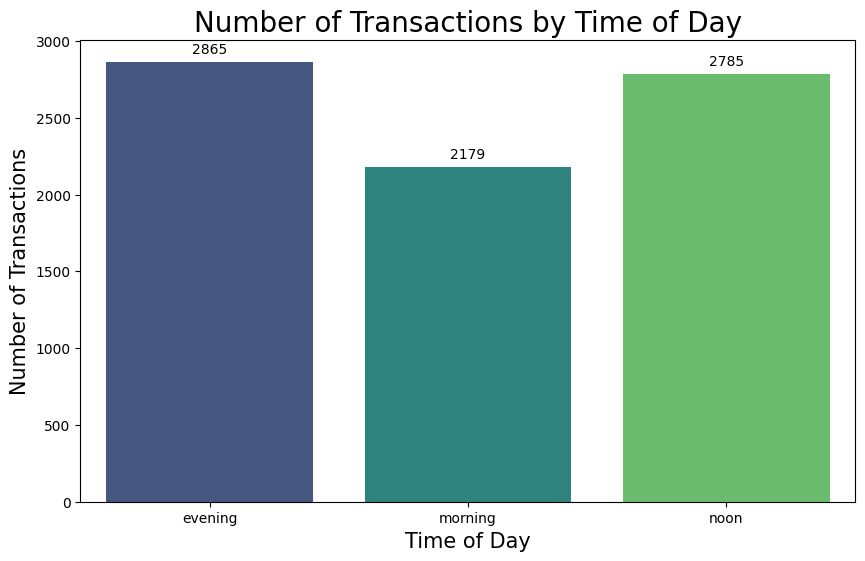

Sales trend by time of day:

  time_of_day  count
0     evening   2865
1     morning   2179
2        noon   2785


In [ ]:
# Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract hour from the timestamp
df['hour'] = df['timestamp'].dt.hour

# Classify the time of day into morning, noon, and evening
def classify_time_of_day(hour):
    if 9 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 15:
        return 'noon'
    elif 16 <= hour <= 20:
        return 'evening'
    else:
        return 'other'

df['time_of_day'] = df['hour'].apply(classify_time_of_day)
df = df[df['time_of_day'] != 'other']  # Filter out transactions outside the specified times

# Function to plot the sales trend for different times of the day
def plot_sales_trend(data):
    # Group by time_of_day and count the occurrences
    sales_trend = data.groupby('time_of_day').size().reset_index(name='count')

    # Plot the results
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x='time_of_day', y='count', data=sales_trend, palette='viridis')
    plt.title('Number of Transactions by Time of Day',fontsize = 20)
    plt.xlabel('Time of Day',fontsize = 15)
    plt.ylabel('Number of Transactions',fontsize = 15)

    # Add number on top of bars
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 9),
                         textcoords='offset points')

    plt.show()

    # Print the results
    print("Sales trend by time of day:\n")
    print(sales_trend)

# Analyze and plot sales trend by time of day
plot_sales_trend(df)


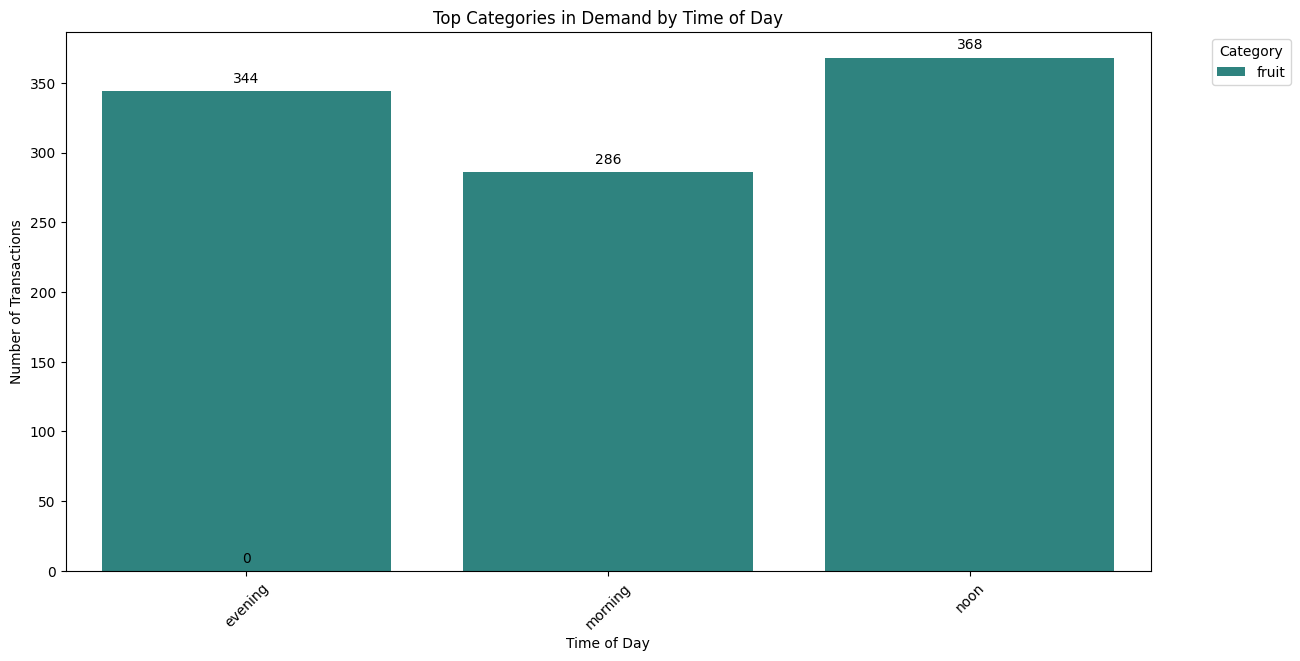

Top categories in demand by time of day:

   time_of_day category  count
10     evening    fruit    344
32     morning    fruit    286
54        noon    fruit    368


In [ ]:
# Function to find the category in demand for each section
def find_category_in_demand(data):
    # Group by time_of_day and category, then count the occurrences
    demand_by_category = data.groupby(['time_of_day', 'category']).size().reset_index(name='count')

    # Find the top category for each time of day
    top_categories = demand_by_category.loc[demand_by_category.groupby('time_of_day')['count'].idxmax()]

    # Plot the results
    plt.figure(figsize=(14, 7))
    barplot = sns.barplot(x='time_of_day', y='count', hue='category', data=top_categories, palette='viridis')
    plt.title('Top Categories in Demand by Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)

    # Add number on top of bars
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 9),
                         textcoords='offset points')

    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Print the results
    print("Top categories in demand by time of day:\n")
    print(top_categories)

# Analyze and plot category in demand by time of day
find_category_in_demand(df)

# Top selling products

<ipython-input-61-14fa28b76553>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='quantity', y='product_id', data=top_10_selling_products, palette='viridis')


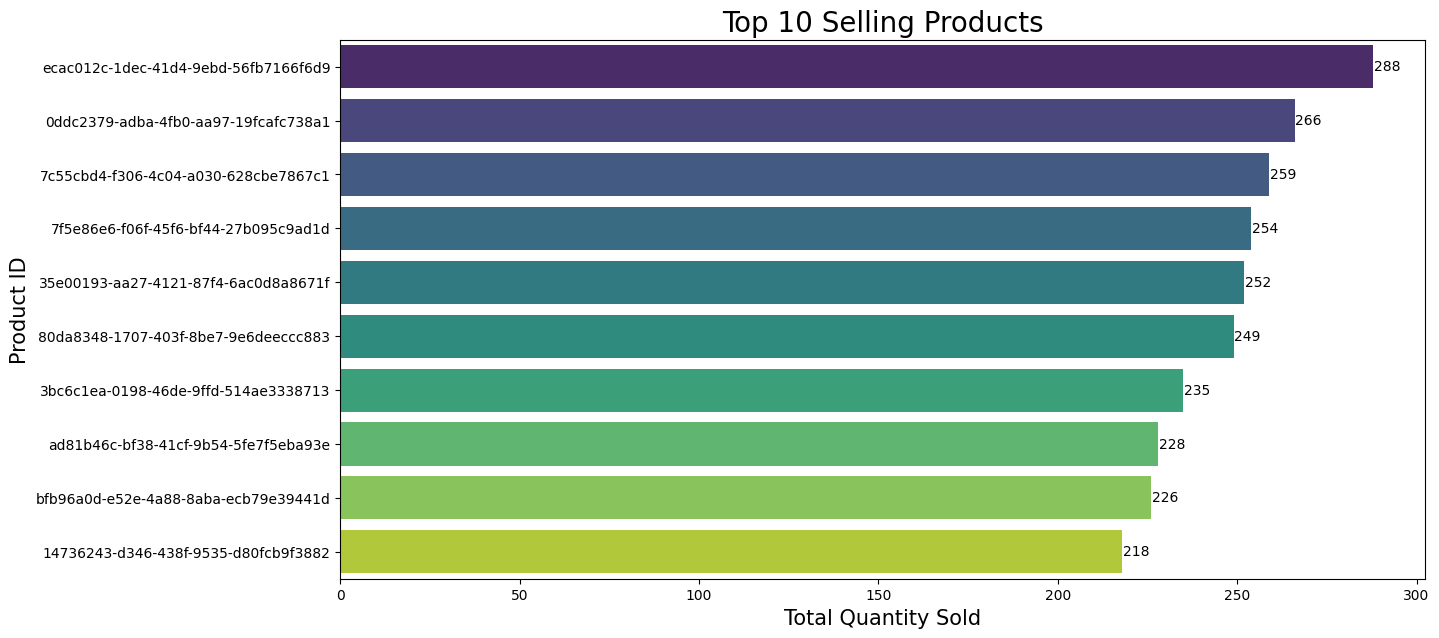

Top 10 Selling Products:

                               product_id  quantity
287  ecac012c-1dec-41d4-9ebd-56fb7166f6d9       288
18   0ddc2379-adba-4fb0-aa97-19fcafc738a1       266
163  7c55cbd4-f306-4c04-a030-628cbe7867c1       259
169  7f5e86e6-f06f-45f6-bf44-27b095c9ad1d       254
81   35e00193-aa27-4121-87f4-6ac0d8a8671f       252
172  80da8348-1707-403f-8be7-9e6deeccc883       249
90   3bc6c1ea-0198-46de-9ffd-514ae3338713       235
225  ad81b46c-bf38-41cf-9b54-5fe7f5eba93e       228
243  bfb96a0d-e52e-4a88-8aba-ecb79e39441d       226
30   14736243-d346-438f-9535-d80fcb9f3882       218


In [ ]:
# Group by 'product_id' and sum the 'quantity'
top_selling_products = df.groupby('product_id')['quantity'].sum().reset_index()

# Sort the results to identify the top-selling products
top_selling_products = top_selling_products.sort_values(by='quantity', ascending=False)

# Display the top 10 selling products
top_10_selling_products = top_selling_products.head(10)

# Plot the top 10 selling products
plt.figure(figsize=(14, 7))
barplot = sns.barplot(x='quantity', y='product_id', data=top_10_selling_products, palette='viridis')
plt.title('Top 10 Selling Products',fontsize = 20)
plt.ylabel('Product ID',fontsize = 15)
plt.xlabel('Total Quantity Sold',fontsize = 15)

# Add number on top of bars
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.0f'),
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='center', va='center',
                     xytext=(10, 0),
                     textcoords='offset points')

plt.show()

# Print the results
print("Top 10 Selling Products:\n")
print(top_10_selling_products)

<ipython-input-48-7c715608d862>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='quantity', y='category', data=quantity_by_category, palette='viridis')


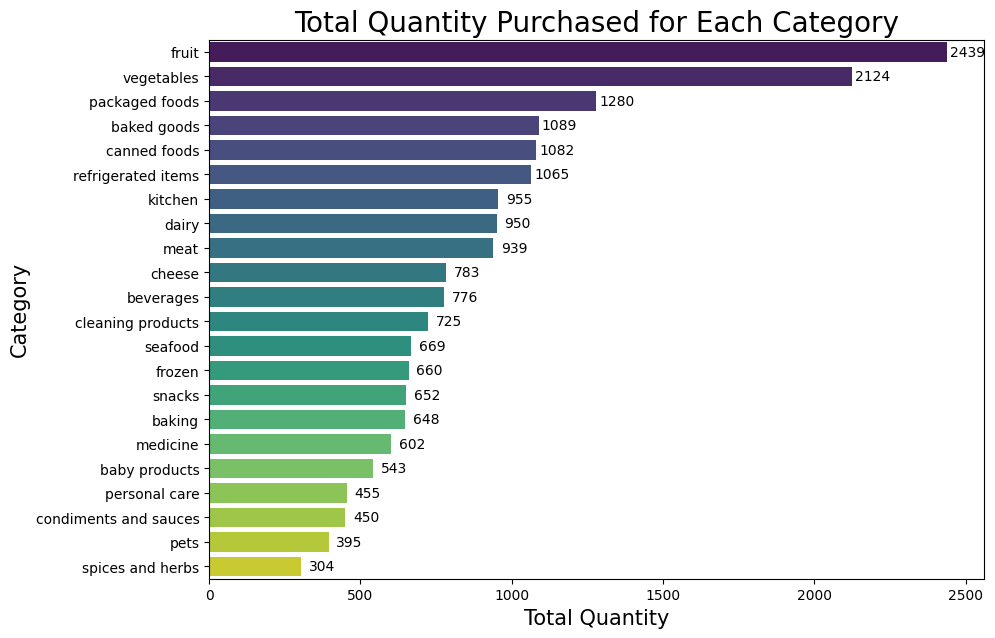

In [ ]:
# Group by category and sum the quantity
quantity_by_category = df.groupby('category')['quantity'].sum().reset_index()

# Sort the results for better visualization
quantity_by_category = quantity_by_category.sort_values(by='quantity', ascending=False)

# Plot the results
plt.figure(figsize=(10, 7))
barplot = sns.barplot(x='quantity', y='category', data=quantity_by_category, palette='viridis')
plt.title('Total Quantity Purchased for Each Category', fontsize=20)
plt.xlabel('Total Quantity', fontsize=15)
plt.ylabel('Category', fontsize=15)

# Add number on top of bars
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.0f'),
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='center', va='center',
                     xytext=(15, 0),
                     textcoords='offset points')

plt.show()

<ipython-input-50-c6603c17720a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='unit_price', y='category', data=avg_unit_price_by_category, palette='viridis')


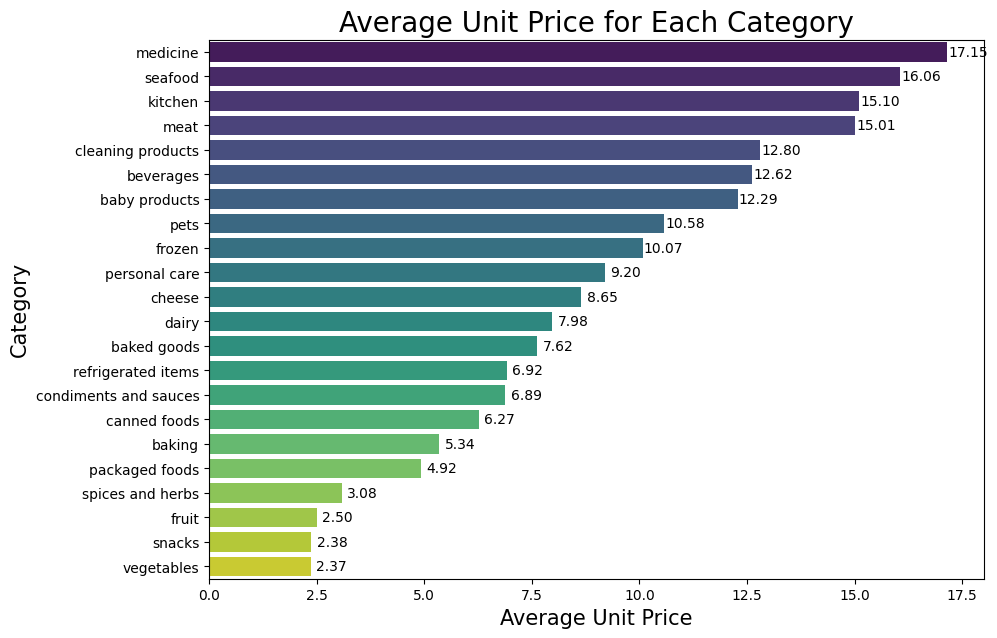

In [ ]:
# Group by category and calculate the average unit price
avg_unit_price_by_category = df.groupby('category')['unit_price'].mean().reset_index()

# Sort the results for better visualization
avg_unit_price_by_category = avg_unit_price_by_category.sort_values(by='unit_price', ascending=False)

# Plot the results
plt.figure(figsize=(10, 7))
barplot = sns.barplot(x='unit_price', y='category', data=avg_unit_price_by_category, palette='viridis')
plt.title('Average Unit Price for Each Category', fontsize=20)
plt.xlabel('Average Unit Price', fontsize=15)
plt.ylabel('Category', fontsize=15)

# Add number on top of bars
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.2f'),
                     (p.get_width(), p.get_y() + p.get_height() / 2.),
                     ha='center', va='center',
                     xytext=(15, 0),
                     textcoords='offset points')

plt.show()